In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import requests
import sys
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import ast
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from string import punctuation
import nltk
from nltk.text import Text
from datetime import datetime, timedelta

In [99]:
data = pd.read_csv('wallstreetbets_tweets_1025.csv', index_col = False)

In [100]:
data

,UserName,Timestamp,Post,Reply,Retweet,Likes
0,Roaring Sessions\n@roaringsessions\n·\n3m,2021-10-25T21:02:50.000Z,Which SPAC will go parabolic next after what w...,NaN,NaN,2
1,ⒼⓄⓄⒹ ⒽⒺⒶⓇⓉ\n@StockTradesUSA\n·\n4m,2021-10-25T21:02:04.000Z,Next compounding Machine $RDBX \n\nTiny Publi...,NaN,NaN,1
2,kk4sw\n@kk4sw\n·\n5m,2021-10-25T21:01:25.000Z,"iceberg research tomorrow, probably $dwac #dwa...",NaN,NaN,NaN
3,FINAP$E\n@FintwitSynapse\n·\n6m,2021-10-25T21:00:11.000Z,Top Trending Stocks on #fintwit: \n1. $FB \n2....,NaN,NaN,3
4,topstonks\n@topstonks\n·\n43m,2021-10-25T20:23:28.000Z,$DWAC working it's way into the top 10 most me...,NaN,NaN,2
...,...,...,...,...,...,...
3060,peace\n@rasta1lovee\n·\nOct 15,2021-10-15T19:34:26.000Z,https://reddit.com/r/AMPTokenTruth/comments/q8...,NaN,NaN,1
3061,peace\n@rasta1lovee\n·\nOct 15,2021-10-15T19:29:22.000Z,https://reddit.com/r/AMPTokenTruth/comments/q8...,1.0,NaN,NaN
3062,Antonio\n@AFtuit\n·\nOct 15,2021-10-15T19:27:00.000Z,My quality selection: \n\n$MKC $VRTX \n\nLike ...,NaN,NaN,NaN
3063,peace\n@rasta1lovee\n·\nOct 15,2021-10-15T19:26:44.000Z,https://reddit.com/r/AMPTokenTruth/comments/q8...,NaN,NaN,1


In [101]:
n= len(data)
data["ProperNouns"] = np.zeros(n)
data["Numbers"] = np.zeros(n)
data["Hashtags"] = np.zeros(n)
data["Symbols"] = np.zeros(n)
for i in range(n):
    text = data["Post"][i]
    words = nltk.word_tokenize(text)
    taggedtoken = nltk.pos_tag(words)
    NPcount = 0
    NUMcount = 0
    SYMcount = 0
    HASHcount = 0
    for word in taggedtoken:
        if word[1] == "NNP" or word[1] == "NNPS":
            NPcount += 1
        if word[1] == "JJ" or word[1] == "CD":
            NUMcount += 1
        if word[0] == "#":
            HASHcount += 1
        if word[0] in symbolset :
            SYMcount += 1
    data["ProperNouns"][i] = NPcount
    data["Numbers"][i] = NUMcount
    data["Hashtags"][i] = HASHcount
    data["Symbols"][i] = SYMcount

<ipython-input-101-96904654fb07>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ProperNouns"][i] = NPcount
<ipython-input-101-96904654fb07>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Numbers"][i] = NUMcount
<ipython-input-101-96904654fb07>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hashtags"][i] = HASHcount
<ipython-input-101-96904654fb07>:26: SettingWithCopyWarning: 
A value is trying to be set on a 

In [108]:
data["Post"][32]

"Let's turn \n@portilloshotdog\n stock into the next \n@GameStop\n and \n@AMCTheatres\n craze.  Please and thanks. #wallstreetbets"

In [102]:
data

,UserName,Timestamp,Post,Reply,Retweet,Likes,ProperNouns,Numbers,Hashtags,Symbols
0,Roaring Sessions\n@roaringsessions\n·\n3m,2021-10-25T21:02:50.000Z,Which SPAC will go parabolic next after what w...,NaN,NaN,2,6.0,7.0,2.0,9.0
1,ⒼⓄⓄⒹ ⒽⒺⒶⓇⓉ\n@StockTradesUSA\n·\n4m,2021-10-25T21:02:04.000Z,Next compounding Machine $RDBX \n\nTiny Publi...,NaN,NaN,1,22.0,21.0,2.0,24.0
2,kk4sw\n@kk4sw\n·\n5m,2021-10-25T21:01:25.000Z,"iceberg research tomorrow, probably $dwac #dwa...",NaN,NaN,NaN,1.0,2.0,2.0,4.0
3,FINAP$E\n@FintwitSynapse\n·\n6m,2021-10-25T21:00:11.000Z,Top Trending Stocks on #fintwit: \n1. $FB \n2....,NaN,NaN,3,5.0,18.0,4.0,27.0
4,topstonks\n@topstonks\n·\n43m,2021-10-25T20:23:28.000Z,$DWAC working it's way into the top 10 most me...,NaN,NaN,2,2.0,7.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...
3060,peace\n@rasta1lovee\n·\nOct 15,2021-10-15T19:34:26.000Z,https://reddit.com/r/AMPTokenTruth/comments/q8...,NaN,NaN,1,12.0,14.0,23.0,32.0
3061,peace\n@rasta1lovee\n·\nOct 15,2021-10-15T19:29:22.000Z,https://reddit.com/r/AMPTokenTruth/comments/q8...,1.0,NaN,NaN,16.0,15.0,15.0,25.0
3062,Antonio\n@AFtuit\n·\nOct 15,2021-10-15T19:27:00.000Z,My quality selection: \n\n$MKC $VRTX \n\nLike ...,NaN,NaN,NaN,9.0,0.0,13.0,16.0
3063,peace\n@rasta1lovee\n·\nOct 15,2021-10-15T19:26:44.000Z,https://reddit.com/r/AMPTokenTruth/comments/q8...,NaN,NaN,1,10.0,17.0,22.0,31.0


In [103]:
data = data.replace(np.nan, 0)

In [104]:
data

,UserName,Timestamp,Post,Reply,Retweet,Likes,ProperNouns,Numbers,Hashtags,Symbols
0,Roaring Sessions\n@roaringsessions\n·\n3m,2021-10-25T21:02:50.000Z,Which SPAC will go parabolic next after what w...,0.0,0,2,6.0,7.0,2.0,9.0
1,ⒼⓄⓄⒹ ⒽⒺⒶⓇⓉ\n@StockTradesUSA\n·\n4m,2021-10-25T21:02:04.000Z,Next compounding Machine $RDBX \n\nTiny Publi...,0.0,0,1,22.0,21.0,2.0,24.0
2,kk4sw\n@kk4sw\n·\n5m,2021-10-25T21:01:25.000Z,"iceberg research tomorrow, probably $dwac #dwa...",0.0,0,0,1.0,2.0,2.0,4.0
3,FINAP$E\n@FintwitSynapse\n·\n6m,2021-10-25T21:00:11.000Z,Top Trending Stocks on #fintwit: \n1. $FB \n2....,0.0,0,3,5.0,18.0,4.0,27.0
4,topstonks\n@topstonks\n·\n43m,2021-10-25T20:23:28.000Z,$DWAC working it's way into the top 10 most me...,0.0,0,2,2.0,7.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...
3060,peace\n@rasta1lovee\n·\nOct 15,2021-10-15T19:34:26.000Z,https://reddit.com/r/AMPTokenTruth/comments/q8...,0.0,0,1,12.0,14.0,23.0,32.0
3061,peace\n@rasta1lovee\n·\nOct 15,2021-10-15T19:29:22.000Z,https://reddit.com/r/AMPTokenTruth/comments/q8...,1.0,0,0,16.0,15.0,15.0,25.0
3062,Antonio\n@AFtuit\n·\nOct 15,2021-10-15T19:27:00.000Z,My quality selection: \n\n$MKC $VRTX \n\nLike ...,0.0,0,0,9.0,0.0,13.0,16.0
3063,peace\n@rasta1lovee\n·\nOct 15,2021-10-15T19:26:44.000Z,https://reddit.com/r/AMPTokenTruth/comments/q8...,0.0,0,1,10.0,17.0,22.0,31.0


In [105]:
df = data.astype(str)


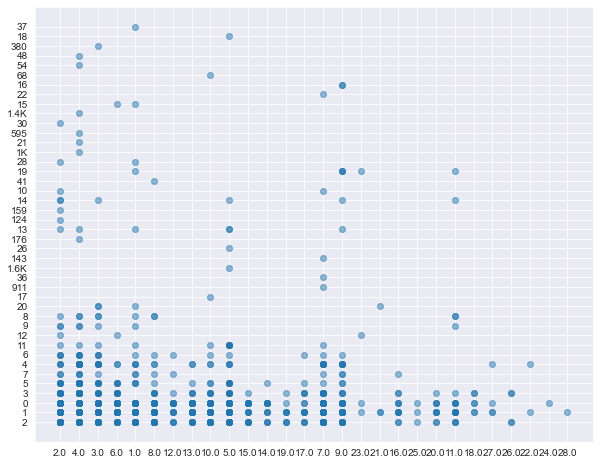

In [94]:
plt.figure(figsize=(10,8))

X = df["Likes"]
y = df["Hashtags"]
plt.scatter(y,X, alpha = 0.5)
plt.show()

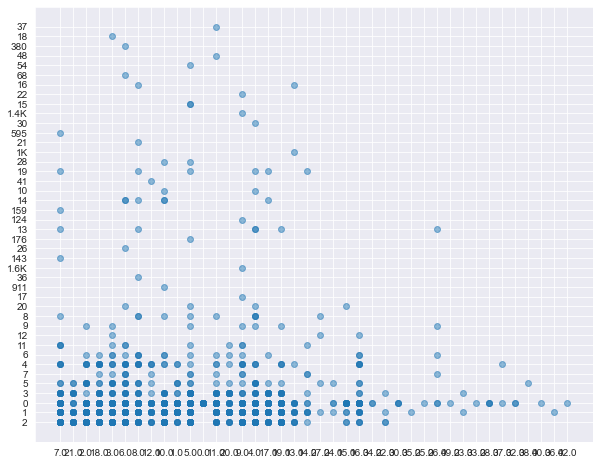

In [95]:
plt.figure(figsize=(10,8))

X = df["Likes"]
y = df["Numbers"]
plt.scatter(y,X, alpha = 0.5)
plt.show()

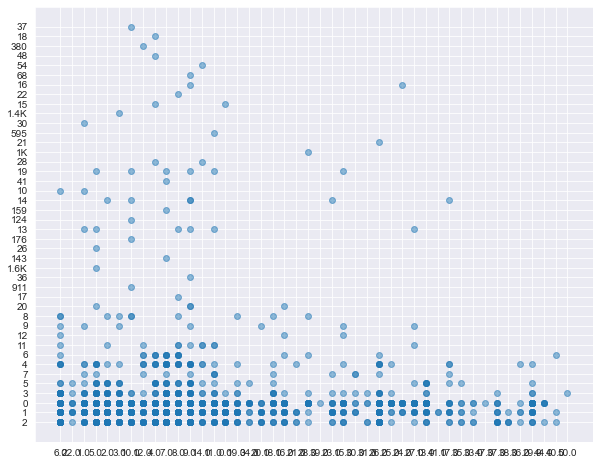

In [96]:
plt.figure(figsize=(10,8))

X = df["Likes"]
y = df["ProperNouns"]
plt.scatter(y,X, alpha = 0.5)
plt.show()

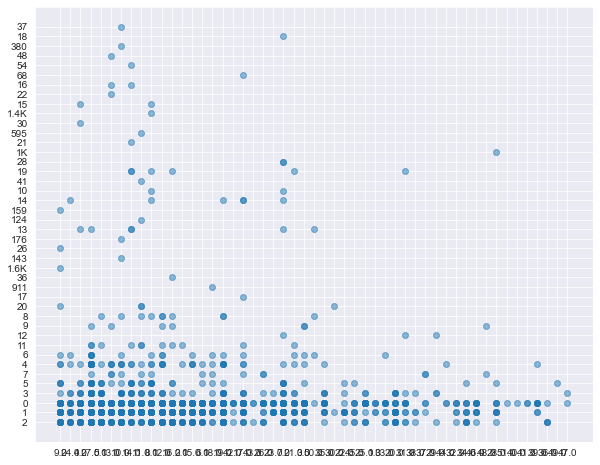

In [106]:
plt.figure(figsize=(10,8))

X = df["Likes"]
y = df["Symbols"]
plt.scatter(y,X, alpha = 0.5)
plt.show()

In [21]:
import string


In [97]:
symbolset = string.punctuation

In [98]:
symbolset

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'